In [237]:
# Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [238]:
incertidumbre_distancia_cm = 0.1
tiempo_de_reaccion_s = 0.16 * 2  
incertidumbre_angulo_rad = np.deg2rad(1)
incertidumbre_diametro_mm = 0.01
incertidumbre_compuerta = 1

def error_de_la_velocidad_cronometro_m_s(base_de_datos):
    error_distancia = incertidumbre_distancia_cm / (np.cos(base_de_datos['angulo_[rad]']) * base_de_datos['tiempo_cronometro_[s]'])
    error_tiempo = - tiempo_de_reaccion_s * base_de_datos['distancia_[cm]'] / (np.cos(base_de_datos['angulo_[rad]']) * base_de_datos['tiempo_cronometro_[s]'] ** 2)
    error_angulo = incertidumbre_angulo_rad * (base_de_datos['distancia_[cm]'] / base_de_datos['tiempo_cronometro_[s]']) * (np.cos(base_de_datos['angulo_[rad]'])  ** -1) * np.tan(base_de_datos['angulo_[rad]'])

    error_velocidad_cronometro_cm_s = np.sqrt( (error_distancia)**2 + (error_tiempo)**2 + (error_angulo)**2)
    base_de_datos['incertidumbre_velocidad_cronometro_[m/s]'] = error_velocidad_cronometro_cm_s * 1e-2

    return base_de_datos

def error_de_la_velocidad_compuerta_m_s(base_de_datos):
    base_de_datos['incertidumbre_velocidad_compuerta_[m/s]'] = ((incertidumbre_diametro_mm / base_de_datos['diamentro_[mm]'])) + (incertidumbre_compuerta / (base_de_datos['tiempo_haz_[µs]'])) * base_de_datos['velocidad_compuerta_[m/s]']
    return base_de_datos

def generar_histograma(base_de_datos, variable ,titulo):
    sns.histplot(base_de_datos, x= variable, bins= 6)
    plt.title(titulo)
    plt.xlabel('velocidad compuerta [m/s]')
    plt.show()

def generar_medias_esdatisditcas(base_de_datos, variable, titulo):
    promedio = statistics.mean(base_de_datos[variable])
    mediana = statistics.median(base_de_datos[variable])
    moda = statistics.mode(base_de_datos[variable])
    std = statistics.stdev(base_de_datos[variable])

    print(f'''{titulo}
    Promedio = {promedio} [m/s]
    Mediana = {mediana} [m/s]
    Moda = {moda} [m/s]
    Desviación estándar = {std} [m/s]''')

In [239]:
altura_1_df = pd.read_excel('Tiro parabolico.xlsx', sheet_name='Hoja2')
altura_2_df = pd.read_excel('Tiro parabolico.xlsx', sheet_name='Hoja3')
altura_3_df = pd.read_excel('Tiro parabolico.xlsx', sheet_name='Hoja4')
altura_4_df = pd.read_excel('Tiro parabolico.xlsx', sheet_name='Hoja5')
altura_5_df = pd.read_excel('Tiro parabolico.xlsx', sheet_name='Hoja6')

In [240]:
altura_1_df.columns =  altura_1_df.columns.str.lower().str.replace(' ', '_')
altura_2_df.columns =  altura_2_df.columns.str.lower().str.replace(' ', '_')
altura_3_df.columns =  altura_3_df.columns.str.lower().str.replace(' ', '_')
altura_4_df.columns =  altura_4_df.columns.str.lower().str.replace(' ', '_')
altura_5_df.columns =  altura_5_df.columns.str.lower().str.replace(' ', '_')

In [241]:
altura_1_df['angulo_[rad]'] = np.deg2rad(altura_1_df['angulo_[grados°]'])
altura_2_df['angulo_[rad]'] = np.deg2rad(altura_2_df['angulo_[grados°]'])
altura_3_df['angulo_[rad]'] = np.deg2rad(altura_3_df['angulo_[grados°]'])
altura_4_df['angulo_[rad]'] = np.deg2rad(altura_4_df['angulo_[grados°]'])
altura_5_df['angulo_[rad]'] = np.deg2rad(altura_5_df['angulo_[grados°]'])

In [242]:
altura_1_df['velocidad_cronometro_[m/s]'] = (altura_1_df['distancia_[cm]'] / altura_1_df['tiempo_cronometro_[s]']) * (1 / np.cos(altura_1_df['angulo_[rad]'])) * 1e-2
altura_2_df['velocidad_cronometro_[m/s]'] = (altura_2_df['distancia_[cm]'] / altura_2_df['tiempo_cronometro_[s]']) * (1 / np.cos(altura_2_df['angulo_[rad]'])) * 1e-2
altura_3_df['velocidad_cronometro_[m/s]'] = (altura_3_df['distancia_[cm]'] / altura_3_df['tiempo_cronometro_[s]']) * (1 / np.cos(altura_3_df['angulo_[rad]'])) * 1e-2
altura_4_df['velocidad_cronometro_[m/s]'] = (altura_4_df['distancia_[cm]'] / altura_4_df['tiempo_cronometro_[s]']) * (1 / np.cos(altura_4_df['angulo_[rad]'])) * 1e-2
altura_5_df['velocidad_cronometro_[m/s]'] = (altura_5_df['distancia_[cm]'] / altura_5_df['tiempo_cronometro_[s]']) * (1 / np.cos(altura_5_df['angulo_[rad]'])) * 1e-2

In [243]:
altura_1_df = error_de_la_velocidad_cronometro_m_s(altura_1_df)
altura_2_df = error_de_la_velocidad_cronometro_m_s(altura_2_df)
altura_3_df = error_de_la_velocidad_cronometro_m_s(altura_3_df)
altura_4_df = error_de_la_velocidad_cronometro_m_s(altura_4_df)
altura_5_df = error_de_la_velocidad_cronometro_m_s(altura_5_df)

In [244]:
altura_1_df['velocidad_compuerta_[m/s]'] = (altura_1_df['diamentro_[mm]']) / (altura_1_df['tiempo_haz_[µs]']) * 1e3
altura_2_df['velocidad_compuerta_[m/s]'] = (altura_2_df['diamentro_[mm]']) / (altura_2_df['tiempo_haz_[µs]']) * 1e3
altura_3_df['velocidad_compuerta_[m/s]'] = (altura_3_df['diamentro_[mm]']) / (altura_3_df['tiempo_haz_[µs]']) * 1e3
altura_4_df['velocidad_compuerta_[m/s]'] = (altura_4_df['diamentro_[mm]']) / (altura_4_df['tiempo_haz_[µs]']) * 1e3
altura_5_df['velocidad_compuerta_[m/s]'] = (altura_5_df['diamentro_[mm]']) / (altura_5_df['tiempo_haz_[µs]']) * 1e3

In [245]:
altura_1_df = error_de_la_velocidad_compuerta_m_s(altura_1_df)
altura_2_df = error_de_la_velocidad_compuerta_m_s(altura_2_df)
altura_3_df = error_de_la_velocidad_compuerta_m_s(altura_3_df)
altura_4_df = error_de_la_velocidad_compuerta_m_s(altura_4_df)
altura_5_df = error_de_la_velocidad_compuerta_m_s(altura_5_df)

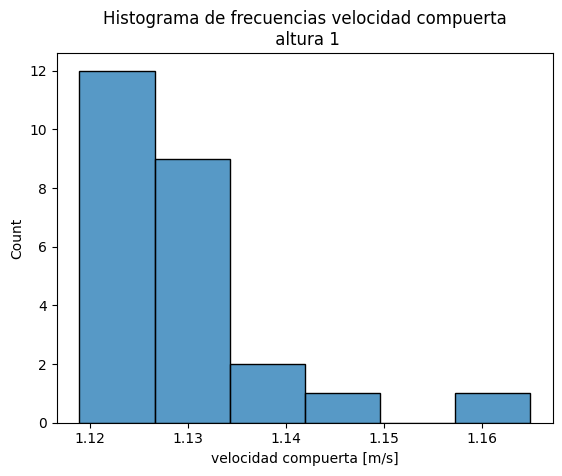

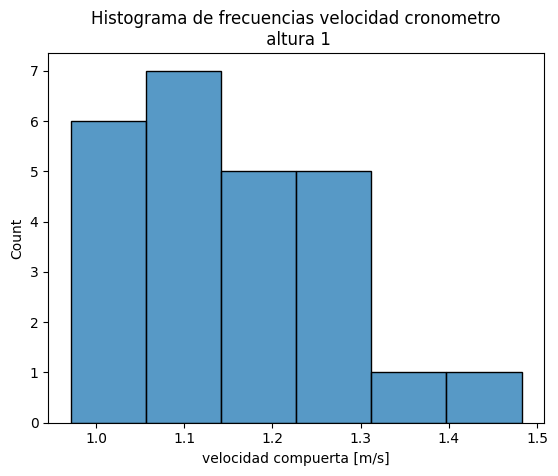

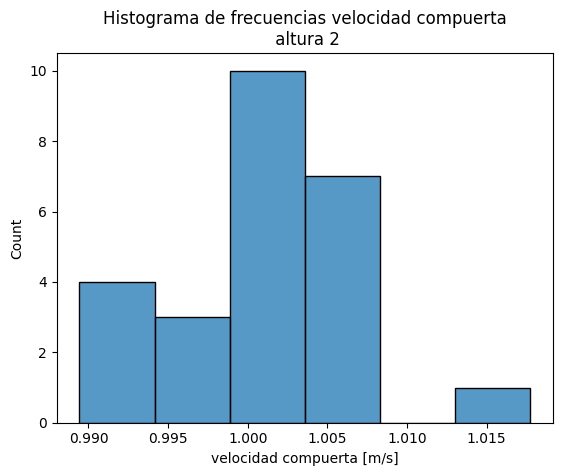

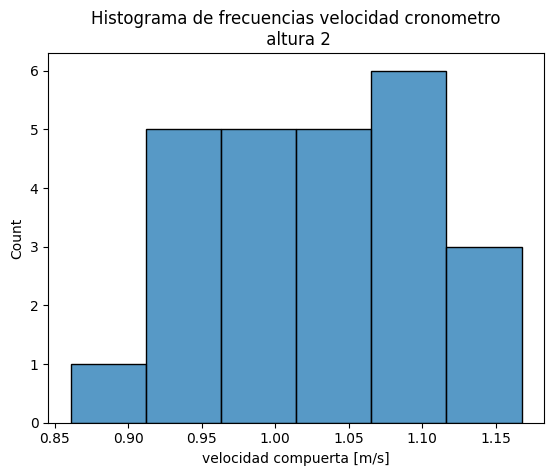

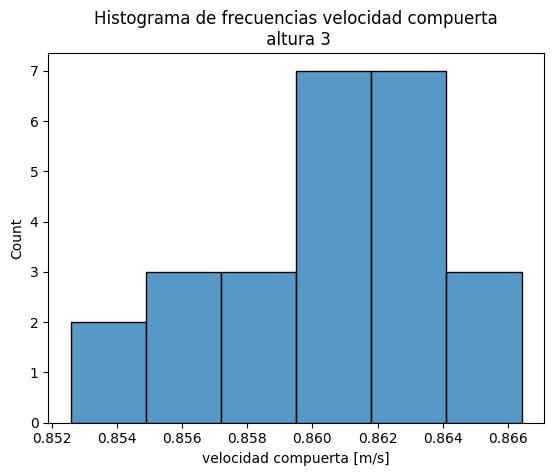

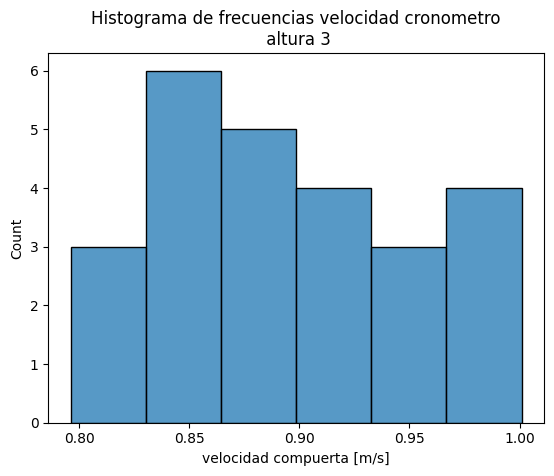

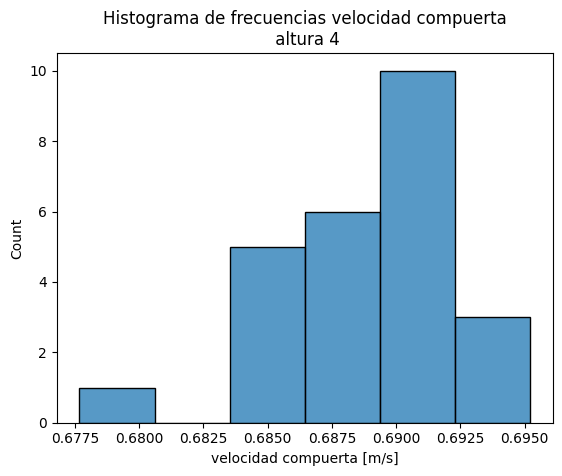

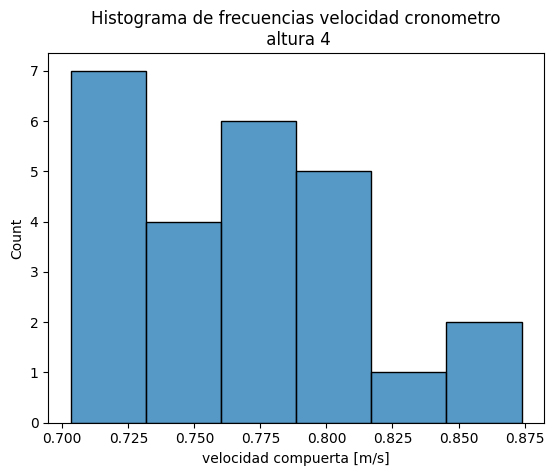

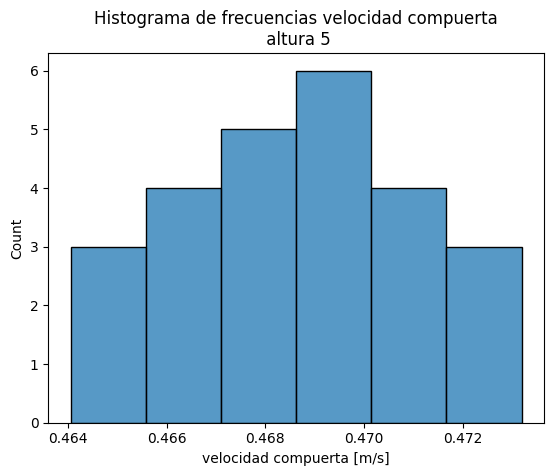

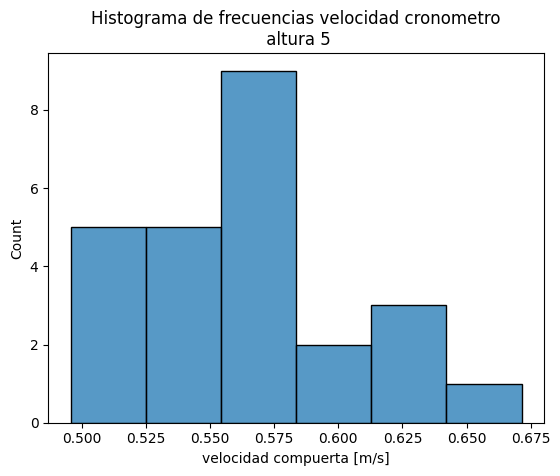

In [246]:
generar_histograma(altura_1_df, variable= 'velocidad_compuerta_[m/s]', titulo= 'Histograma de frecuencias velocidad compuerta\n altura 1')
generar_histograma(altura_1_df, variable= 'velocidad_cronometro_[m/s]', titulo= 'Histograma de frecuencias velocidad cronometro\n altura 1')

generar_histograma(altura_2_df, variable= 'velocidad_compuerta_[m/s]', titulo= 'Histograma de frecuencias velocidad compuerta\n altura 2')
generar_histograma(altura_2_df, variable= 'velocidad_cronometro_[m/s]', titulo= 'Histograma de frecuencias velocidad cronometro\n altura 2')

generar_histograma(altura_3_df, variable= 'velocidad_compuerta_[m/s]', titulo= 'Histograma de frecuencias velocidad compuerta\n altura 3')
generar_histograma(altura_3_df, variable= 'velocidad_cronometro_[m/s]', titulo= 'Histograma de frecuencias velocidad cronometro\n altura 3')

generar_histograma(altura_4_df, variable= 'velocidad_compuerta_[m/s]', titulo= 'Histograma de frecuencias velocidad compuerta\n altura 4')
generar_histograma(altura_4_df, variable= 'velocidad_cronometro_[m/s]', titulo= 'Histograma de frecuencias velocidad cronometro\n altura 4')

generar_histograma(altura_5_df, variable= 'velocidad_compuerta_[m/s]', titulo= 'Histograma de frecuencias velocidad compuerta\n altura 5')
generar_histograma(altura_5_df, variable= 'velocidad_cronometro_[m/s]', titulo= 'Histograma de frecuencias velocidad cronometro\n altura 5')

In [247]:
generar_medias_esdatisditcas(altura_1_df, 'velocidad_compuerta_[m/s]','Velocidad cronometro altura 1')
generar_medias_esdatisditcas(altura_1_df,'velocidad_cronometro_[m/s]' , 'Velocidad compuerta altura 1')
print('-'*60)

generar_medias_esdatisditcas(altura_2_df, 'velocidad_compuerta_[m/s]','Velocidad cronometro altura 2')
generar_medias_esdatisditcas(altura_2_df,'velocidad_cronometro_[m/s]' , 'Velocidad compuerta altura 2')
print('-'*60)

generar_medias_esdatisditcas(altura_3_df, 'velocidad_compuerta_[m/s]','Velocidad cronometro altura 3')
generar_medias_esdatisditcas(altura_3_df,'velocidad_cronometro_[m/s]' , 'Velocidad compuerta altura 3')
print('-'*60)

generar_medias_esdatisditcas(altura_4_df, 'velocidad_compuerta_[m/s]','Velocidad cronometro altura 4')
generar_medias_esdatisditcas(altura_4_df,'velocidad_cronometro_[m/s]' , 'Velocidad compuerta altura 4')
print('-'*60)

generar_medias_esdatisditcas(altura_5_df, 'velocidad_compuerta_[m/s]','Velocidad cronometro altura 5')
generar_medias_esdatisditcas(altura_5_df,'velocidad_cronometro_[m/s]' , 'Velocidad compuerta altura 5')


Velocidad cronometro altura 1
    Promedio = 1.1296767588875358 [m/s]
    Mediana = 1.1268535445866341 [m/s]
    Moda = 1.1261672756800651 [m/s]
    Desviación estándar = 0.009580661766791248 [m/s]
Velocidad compuerta altura 1
    Promedio = 1.1585453498629144 [m/s]
    Mediana = 1.132591220949485 [m/s]
    Moda = 1.0272338980704632 [m/s]
    Desviación estándar = 0.12378496472845849 [m/s]
------------------------------------------------------------
Velocidad cronometro altura 2
    Promedio = 1.0006831710956092 [m/s]
    Mediana = 1.0006313131313134 [m/s]
    Moda = 1.001851099372432 [m/s]
    Desviación estándar = 0.005942621048975999 [m/s]
Velocidad compuerta altura 2
    Promedio = 1.022431786223489 [m/s]
    Mediana = 1.0154266118857451 [m/s]
    Moda = 0.942896139608192 [m/s]
    Desviación estándar = 0.075997292866192 [m/s]
------------------------------------------------------------
Velocidad cronometro altura 3
    Promedio = 0.8604234393163964 [m/s]
    Mediana = 0.8608115447